In [1]:
%pylab inline
from __future__ import division
import os
import numpy as np
import PIL.Image as pil
#from PIL import Image
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display

img_height=128
img_width=416
ckpt_file = '/home/johan/Documents/Draft/SfMLearner/models/model-190532'
#fh = open('/home/johan/Documents/Draft/SfMLearner/misc/sample.png', 'r')
#I = pil.open('/home/johan/Documents/Draft/SfMLearner/misc/sample.png')
I = pil.open('/home/johan/Documents/Draft/SfMLearner/2011_09_26(3)/2011_09_26_drive_0005_sync/image_02/data/0000000000.png')
#I = Image.open('/home/johan/Documents/Draft/SfMLearner/misc/sample.png')
I = I.resize((img_width, img_height), pil.ANTIALIAS)
I = np.array(I)

Populating the interactive namespace from numpy and matplotlib


In [2]:
sfm = SfMLearner()
sfm.setup_inference(img_height,
                    img_width,
                    mode='depth')

In [3]:
saver = tf.train.Saver([var for var in tf.model_variables()]) 
with tf.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I[None,:,:,:], sess, mode='depth')

INFO:tensorflow:Restoring parameters from /home/johan/Documents/Draft/SfMLearner/models/model-190532


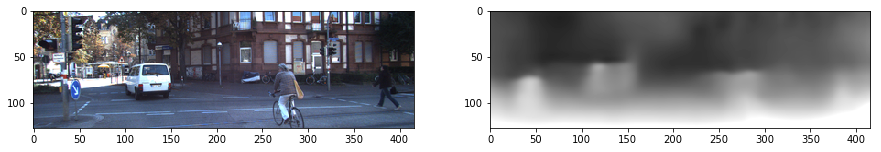

In [4]:
figure(figsize=(15,15))
subplot(1,2,1); imshow(I)
subplot(1,2,2); imshow(normalize_depth_for_display(pred['depth'][0,:,:,0]))

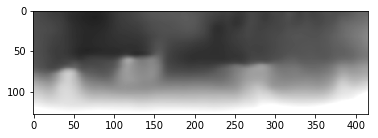

In [5]:
imshow(normalize_depth_for_display(pred['depth'][0,:,:,0]))

(128, 416)


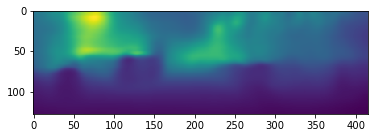

In [6]:
imshow(pred['depth'][0,:,:,0])
a = pred['depth'][0,:,:,0]
print(a.shape)

# Testing

In [ ]:
from __future__ import division
import tensorflow as tf
import numpy as np
import os
# import scipy.misc
import PIL.Image as pil
from SfMLearner import SfMLearner

In [ ]:
fh = open('/home/johan/Documents/Draft/SfMLearner/2011_09_26/2011_09_26_drive_0002_sync/image_02/data/0000000002.png', 'r')

In [ ]:
flags = tf.app.flags
flags.DEFINE_integer("batch_size", 4, "The size of of a sample batch")
flags.DEFINE_integer("img_height", 128, "Image height")
flags.DEFINE_integer("img_width", 416, "Image width")
flags.DEFINE_string("dataset_dir", '/home/johan/Documents/Draft/SfMLearner/', "Dataset directory")
flags.DEFINE_string("output_dir",'/home/johan/Documents/Draft/SfMLearner/output/', "Output directory")
flags.DEFINE_string("ckpt_file", '/home/johan/Documents/Draft/SfMLearner/models/model-190532', "checkpoint file")
FLAGS = flags.FLAGS 


def main(_):
    with open('data/kitti/test_files_eigen.txt', 'r') as f:
        test_files = f.readlines()
        test_files = [FLAGS.dataset_dir + t[:-1] for t in test_files]
    if not os.path.exists(FLAGS.output_dir):
        os.makedirs(FLAGS.output_dir)
    basename = os.path.basename(FLAGS.ckpt_file)
    output_file = FLAGS.output_dir + '/' + basename
    print(output_file)
    sfm = SfMLearner()
    sfm.setup_inference(img_height=FLAGS.img_height,
                        img_width=FLAGS.img_width,
                        batch_size=FLAGS.batch_size,
                        mode='depth')
    saver = tf.train.Saver([var for var in tf.model_variables()]) 
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    with tf.Session(config=config) as sess:
        saver.restore(sess, FLAGS.ckpt_file)
        pred_all = []
        for t in range(0, len(test_files), FLAGS.batch_size):
            if t % 100 == 0:
                print('processing %s: %d/%d' % (basename, t, len(test_files)))
            inputs = np.zeros(
                (FLAGS.batch_size, FLAGS.img_height, FLAGS.img_width, 3), 
                dtype=np.uint8)
            for b in range(FLAGS.batch_size):
                idx = t + b
                if idx >= len(test_files):
                    break
                #fh = open(test_files[idx], 'r')
                #print(fh)
                raw_im = pil.open(test_files[idx])
                scaled_im = raw_im.resize((FLAGS.img_width, FLAGS.img_height), pil.ANTIALIAS)
                inputs[b] = np.array(scaled_im)
                # im = scipy.misc.imread(test_files[idx])
                # inputs[b] = scipy.misc.imresize(im, (FLAGS.img_height, FLAGS.img_width))
            pred = sfm.inference(inputs, sess, mode='depth')
            for b in range(FLAGS.batch_size):
                idx = t + b
                if idx >= len(test_files):
                    break
                pred_all.append(pred['depth'][b,:,:,0])
        np.save(output_file, pred_all)

if __name__ == '__main__':
    tf.app.run()

In [ ]:
print(fh)